
# Multiple Linear Regression

**Multiple linear regression** is an extension of simple linear regression that allows us to model the relationship between a dependent variable and **multiple** independent variables. It is used when we want to predict a continuous outcome based on several predictors. The model assumes that the relationship between the dependent variable and the independent variables can be expressed as a linear equation: $$y = \beta_0 + \beta_1 x_1 + \beta_2 x_2 + ... + \beta_n x_n + \epsilon$$ where:

-   $y$ is the dependent variable (the outcome we want to predict).
-   $\beta_0$ is the y-intercept (the value of $y$ when all $x_i$ are 0).
-   $\beta_1, \beta_2, ..., \beta_n$ are the coefficients for each independent variable $x_i$ (the change in $y$ for a one-unit change in $x_i$).
-   $x_1, x_2, ..., x_n$ are the independent variables (the predictors).
-   $\epsilon$ is the error term (the difference between the observed and predicted values).

## Assumptions of Multiple Linear Regression

The assumptions of multiple linear regression are similar to those of simple linear regression, but with some additional considerations due to the presence of multiple predictors:

1.  **Linearity**: The relationship between the dependent variable and each independent variable is linear.
2.  **Independence**: The observations are independent of each other.
3.  **Homoscedasticity**: The variance of the errors is constant across all levels of the independent variables.
4.  **Normality of errors**: The errors (residuals) are normally distributed.
5.  **No multicollinearity**: The independent variables are not too highly correlated with each other.

## Practical Demonstration

We will use a feature of `scikit-learn` to generate a synthetic dataset for linear regression. This will allow us to demonstrate the concepts of linear regression without focusing on data preprocessing or feature engineering.

`scikit-learn` provides a simple way to create synthetic datasets for regression tasks, which can be useful for testing and learning purposes. We will use the `make_regression` function to generate a dataset with a specified number of samples, features, and noise level.

-   Generate a synthetic dataset using the `make_regression` function from `scikit-learn`

In [1]:
import numpy as np
from sklearn.datasets import make_regression

# Generate synthetic dataset
X, y, coef = make_regression(n_samples=100,
                             n_features=2,
                             bias=1, noise=10,
                             coef=True, random_state=42)
# Print the coefficients
print("True coefficients:", coef)

# Create a DataFrame for better visualization
import pandas as pd
df = pd.DataFrame(X, columns=['Feature 1', 'Feature 2'])
df['Target'] = y
print(df.head())

True coefficients: [87.73730719 74.07686178]
   Feature 1  Feature 2      Target
0  -1.191303   0.656554  -48.265023
1   0.058209  -1.142970  -84.162387
2   0.586857   2.190456  212.225658
3   0.473238  -0.072829   30.196562
4   0.738467   0.171368   85.348096


-   Explore the dataset and create a correlation matrix to visualize the relationships between the features and the target variable.

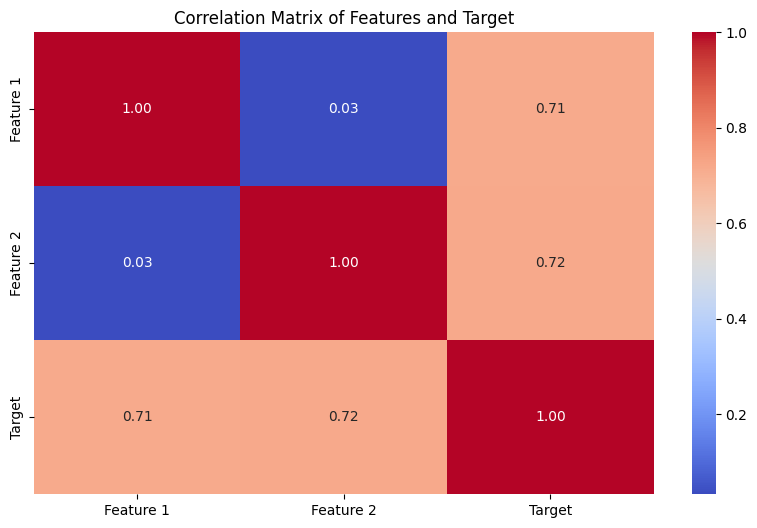

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Features and Target')
plt.show()

-   Perform the train-test split to prepare the data for model training and evaluation.

In [3]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

-   Fit a linear regression model to the training data and make predictions on the test data.

In [4]:
# Fit a linear regression model
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)
# Print the coefficients and intercept
print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)

Coefficients: [86.31018533 73.66927906]
Intercept: 1.0659548036431996


-   Visualize the predictions vs actual values, the residuals, and the residuals vs the predicted values.

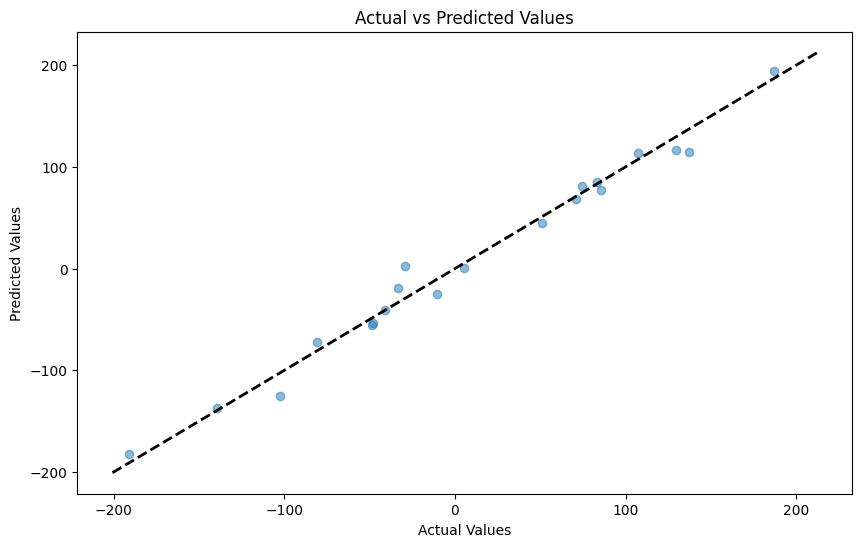

In [5]:
# Visualize the predictions vs actual values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=2)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')
plt.show()

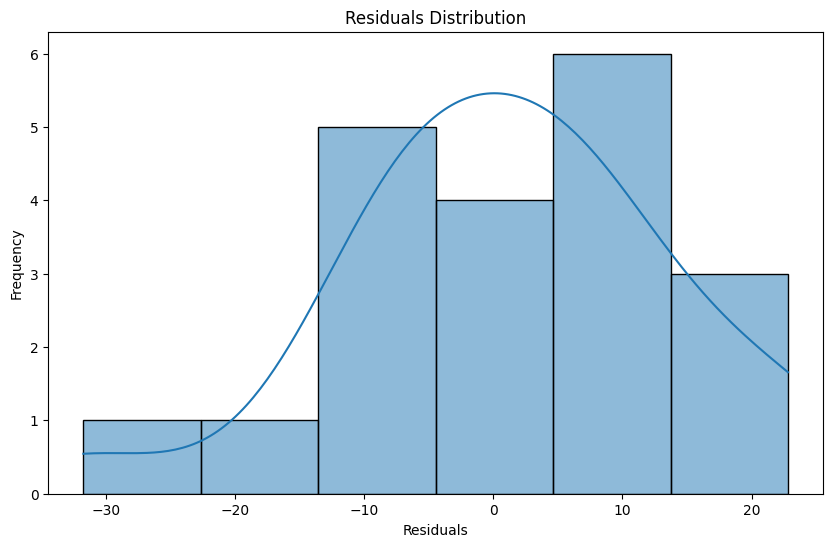

In [6]:
# Visualize the residuals
residuals = y_test - y_pred
plt.figure(figsize=(10, 6))
sns.histplot(residuals, kde=True)
plt.title('Residuals Distribution')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show()

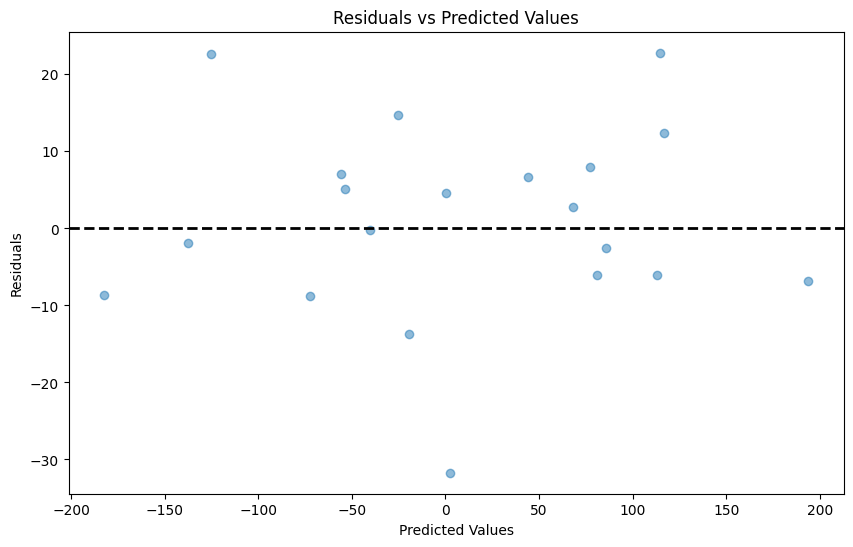

In [7]:
# Visualize the residuals vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_pred, residuals, alpha=0.5)
plt.axhline(0, color='k', linestyle='--', lw=2)
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs Predicted Values')
plt.show()

-   Evaluate the model using metrics such as Mean Squared Error (MSE) and R-squared ($R^2$) score.

In [8]:
# Evaluate the model
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("R^2 Score:", r2)

Mean Absolute Error: 9.667801070655655
Mean Squared Error: 154.62772689490527
Root Mean Squared Error: 12.43493976241563
R^2 Score: 0.9836279308340317


## Hands-on Exercises

-   Generate a synthetic dataset using the `make_regression` function from `scikit-learn`; use the following parameters:
    -   `n_samples` = 200
    -   `n_features` = 3
    -   `noise` = 10
    -   `random_state` = 42
    -   `bias` = 2

In [9]:
X, y, coef = make_regression(n_samples=200,
                             n_features=3,
                             bias=2, noise=10,
                             random_state=42, coef=True)
print(coef)

[72.00365365 22.92513952 72.22525684]


-   Explore the dataset and create a correlation matrix to visualize the relationships between the features and the target variable.

   Feature 1  Feature 2  Feature 3      Target
0   0.130741  -1.430141  -0.440044  -62.558855
1   1.502357  -0.269407   0.717542  156.776889
2   0.647689   0.496714  -0.138264   63.896041
3   0.341756  -0.759133   0.150394   18.485672
4   0.856399  -1.514847  -0.446515  -29.907412


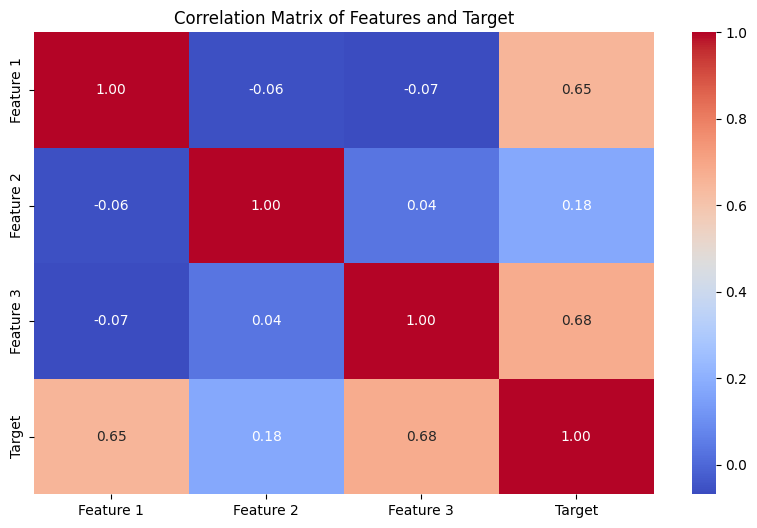

In [10]:
# Create a DataFrame
df = pd.DataFrame(X, columns=['Feature 1', 'Feature 2', 'Feature 3'])
df['Target'] = y
print(df.head())

# Create a correlation matrix and visualize the relationships
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Features and Target')
plt.show()

-   Train a linear regression model on the synthetic dataset; choose two features from the dataset as independent variables and the target variable as the dependent variable.

In [11]:
# Choose two features as independent variables
X = df[['Feature 1', 'Feature 3']]
y = df['Target']

-   Split the dataset into training and testing sets (80% train, 20% test).

In [12]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

-   Fit a linear regression model to the training data.

In [13]:
# Fit a linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


-   Print the coefficients and intercept of the model.

In [14]:
# Print the coefficients and intercept
print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)

Coefficients: [71.10396609 73.12415711]
Intercept: 2.783140422715624


-   Make predictions on the `test` dataset.

In [15]:
y_pred = model.predict(X_test)

-   Calculate and print the Mean Squared Error (MSE) and R-squared ($R^2$) score of the model on the test set.

In [16]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Mean Squared Error:", mse)
print("R^2 Score:", r2)

Mean Squared Error: 542.5939963482766
R^2 Score: 0.9387819694528106


-   Visualize the predictions vs actual values, the residuals, and the residuals vs the predicted values.

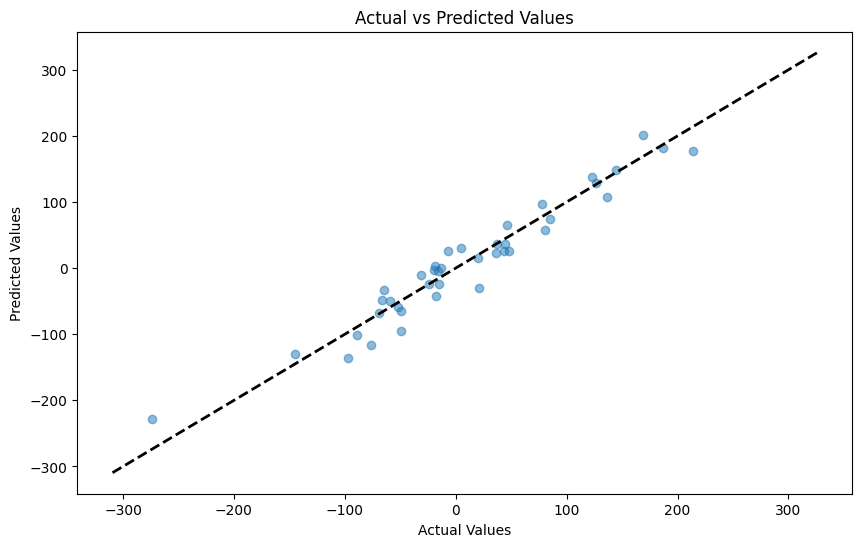

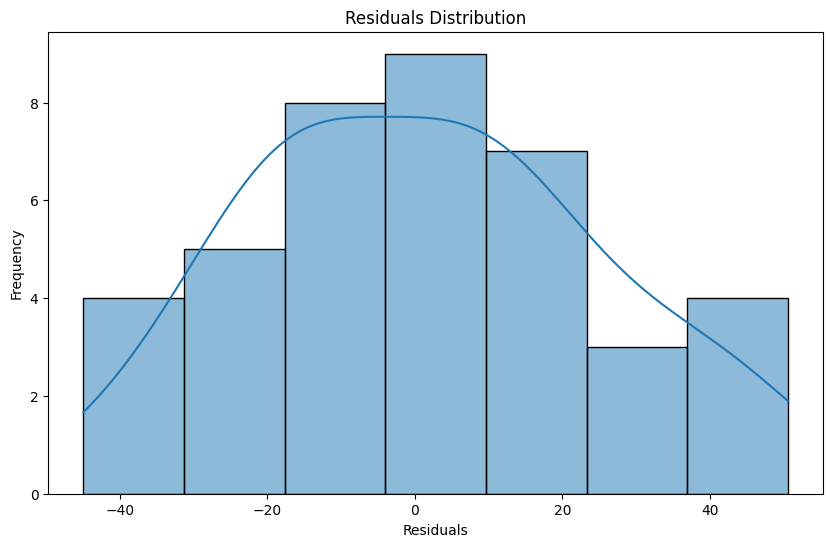

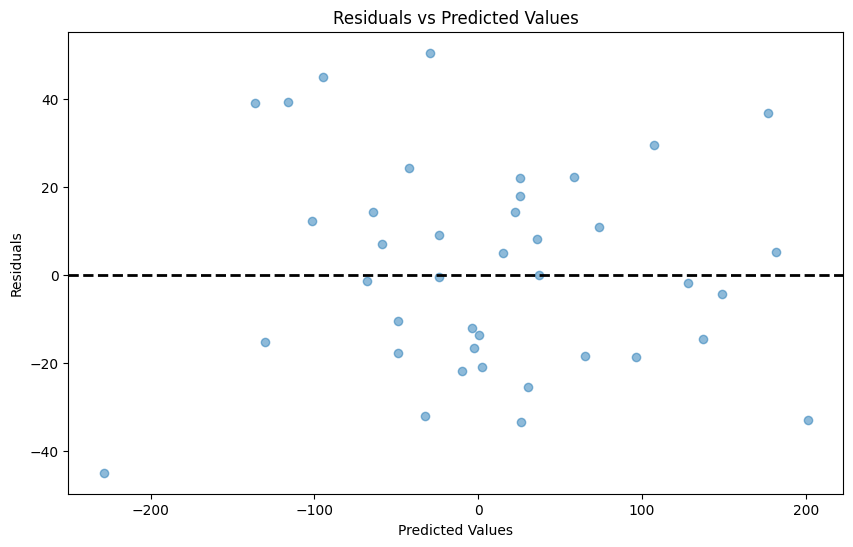

In [17]:
# Visualize the predictions vs actual values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=2)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')
plt.show()

# Visualize the residuals
residuals = y_test - y_pred
plt.figure(figsize=(10, 6))
sns.histplot(residuals, kde=True)
plt.title('Residuals Distribution')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show()

# Visualize the residuals vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_pred, residuals, alpha=0.5)
plt.axhline(0, color='k', linestyle='--', lw=2)
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs Predicted Values')
plt.show()

-   Modify the synthetic dataset by introducing a non-linear relationship (e.g., quadratic or exponential) and observe how the performance metrics change. Fit a simple linear regression model to this new dataset and evaluate its performance.

Mean Absolute Error (MAE): 15.29
Mean Squared Error (MSE): 286.67
Root Mean Squared Error (RMSE): 16.93
R-squared (R^2): 0.93


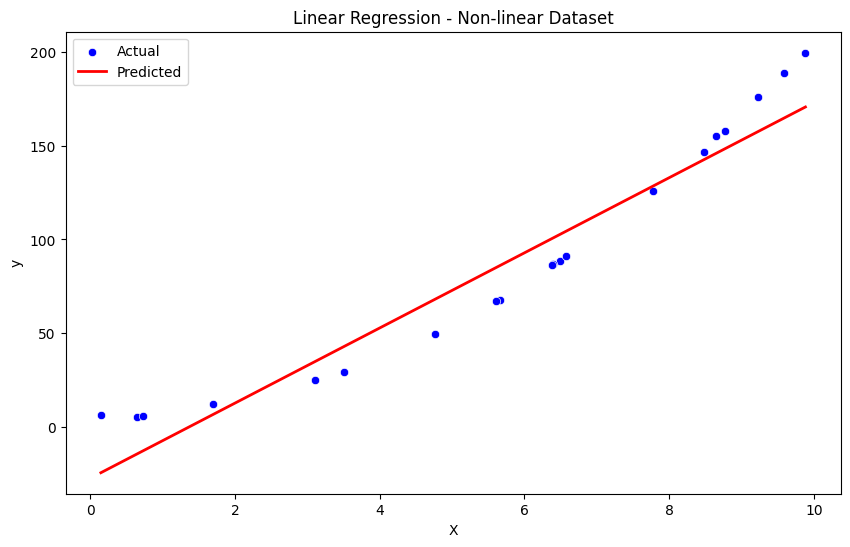

In [18]:
# Generate a non-linear dataset (quadratic relationship)
X = 10 * np.random.rand(100, 1)  # Independent variable
y = 2 * X**2 + 5 + np.random.randn(100, 1)  # Dependent variable with noise

# Create DataFrame
data = pd.DataFrame(np.hstack((X, y)), columns=['X', 'y'])

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(data[['X']], data['y'],
                                                    test_size=0.2,
                                                    random_state=42)

# Fit the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R-squared (R^2): {r2:.2f}")

# Visualize the results
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_test.squeeze(), y=y_test, color='blue', label='Actual')
sns.lineplot(x=X_test.squeeze(), y=y_pred, color='red', label='Predicted', linewidth=2)
plt.xlabel('X')
plt.ylabel('y')
plt.title('Linear Regression - Non-linear Dataset')
plt.legend()
plt.show()